In [16]:
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
import numpy
from keras.utils.vis_utils import plot_model

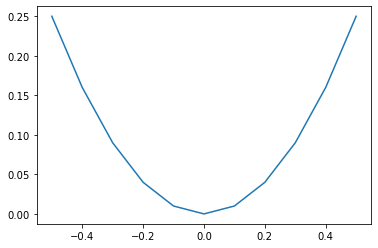

In [1]:
# demonstrate simple x^2 function

# simple function
def calculate(x):
    return x * x

# define inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]

# calculate outputs
outputs = [calculate(x) for x in inputs]

# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()

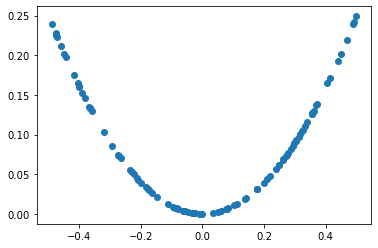

In [2]:
#example of generating random samples from X^2
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot

# generate randoms sample from x^2
def generate_samples(n=100):
    # generate random inputs in [-0.5, 0.5]
    #B=rand(n)
    X1 = rand(n) - 0.5
    #print("B =",B)
    #print("X1 =",X1)
    
    # generate outputs X^2 (quadratic)
    X2 = X1 * X1
    
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    
    return hstack((X1, X2))

# generate samples
data = generate_samples()
#print(data)

# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


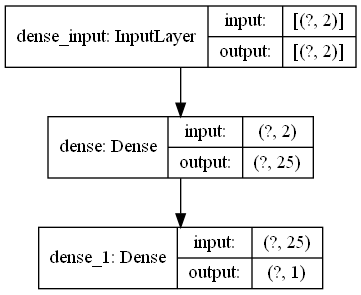

In [3]:
# define the discriminator model
##################################################################################################
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    
    # one hidden layer with 25 nodes
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform',input_dim=n_inputs))
    #The output layer will have one node for the binary classification using the sigmoid activation function
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
#######################################################################################################

# define the discriminator model
model = define_discriminator()

# summarize the model
model.summary()

# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [4]:
import numpy as np
# generate n real samples with class labels
def generate_real_samples(n):
    # generate inputs in [-0.5, 0.5]
    X1 = rand(n) - 0.5
    
    # generate outputs X^2
    X2 = X1 * X1
    
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X = hstack((X1, X2))
    
    # generate class labels
    y = np.ones((n, 1))
    
    return X, y

generate_real_samples(5)

(array([[-0.03251481,  0.00105721],
        [-0.14828261,  0.02198773],
        [-0.49603198,  0.24604772],
        [-0.15163303,  0.02299258],
        [-0.16455251,  0.02707753]]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

In [5]:
# generate n fake samples with class labels
def generate_fake_samples(n):
    # generate inputs in [-1, 1]
    X1 = -1 + rand(n) * 2
    
    # generate outputs in [-1, 1]
    X2 = -1 + rand(n) * 2
    
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X = hstack((X1, X2))
    
    # generate class labels
    y = np.zeros((n, 1))  # (n,1) is the shape
    
    return X, y

generate_fake_samples(5)

(array([[ 0.28869934, -0.62818115],
        [-0.97754191, -0.2650235 ],
        [-0.16955005, -0.52248916],
        [ 0.12285247,  0.57532815],
        [-0.33906891,  0.67806679]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [6]:
# train the discriminator model
def train_discriminator(model, n_epochs=1000,n_batch=128):
    half_batch = int(n_batch / 2)
    
    # run epochs manually
    for i in range(n_epochs):
        # generate real examples
        X_real, y_real = generate_real_samples(half_batch)
        
        # update model
        model.train_on_batch(X_real, y_real)
        
        # generate fake examples
        X_fake, y_fake = generate_fake_samples(half_batch)
        
        # update model
        model.train_on_batch(X_fake, y_fake)
        
        # evaluate the model
        _, acc_real = model.evaluate(X_real, y_real, verbose=1)
        _, acc_fake = model.evaluate(X_fake, y_fake, verbose=1)
        print(i, acc_real, acc_fake)


# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

2/2 [==============================] - 0s 732us/step - loss: 0.9570 - accuracy: 0.4062
0 0.546875 0.40625
2/2 [==============================] - 0s 513us/step - loss: 0.9744 - accuracy: 0.3750
1 0.59375 0.375
2/2 [==============================] - 0s 994us/step - loss: 0.8341 - accuracy: 0.4219
2 0.546875 0.421875
2/2 [==============================] - 0s 957us/step - loss: 0.8807 - accuracy: 0.4375
3 0.546875 0.4375
2/2 [==============================] - 0s 999us/step - loss: 1.0135 - accuracy: 0.2812
4 0.53125 0.28125
2/2 [==============================] - 0s 906us/step - loss: 1.0439 - accuracy: 0.3281
5 0.5 0.328125
2/2 [==============================] - 0s 999us/step - loss: 0.7106 - accuracy: 0.5625
6 0.546875 0.5625
2/2 [==============================] - 0s 516us/step - loss: 0.8814 - accuracy: 0.5156
7 0.5 0.515625
2/2 [==============================] - 0s 998us/step - loss: 0.8231 - accuracy: 0.4062
8 0.453125 0.40625
2/2 [==============================] - 0s 498us/step - loss

2/2 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.5469
37 0.59375 0.546875
2/2 [==============================] - 0s 2ms/step - loss: 0.7613 - accuracy: 0.5156
38 0.546875 0.515625
2/2 [==============================] - 0s 995us/step - loss: 0.7129 - accuracy: 0.5469
39 0.609375 0.546875
2/2 [==============================] - 0s 999us/step - loss: 0.9167 - accuracy: 0.3594
40 0.5 0.359375
2/2 [==============================] - 0s 498us/step - loss: 0.7637 - accuracy: 0.5156
41 0.484375 0.515625
2/2 [==============================] - 0s 1ms/step - loss: 0.8291 - accuracy: 0.4375
42 0.46875 0.4375
2/2 [==============================] - 0s 999us/step - loss: 0.7199 - accuracy: 0.5625
43 0.421875 0.5625
2/2 [==============================] - 0s 812us/step - loss: 0.7074 - accuracy: 0.5625
44 0.578125 0.5625
2/2 [==============================] - 0s 504us/step - loss: 0.7736 - accuracy: 0.5000
45 0.546875 0.5
2/2 [==============================] - 0s 1ms/step -

66 0.609375 0.484375
2/2 [==============================] - 0s 999us/step - loss: 0.6684 - accuracy: 0.5938
67 0.6875 0.59375
2/2 [==============================] - 0s 998us/step - loss: 0.6759 - accuracy: 0.5625
68 0.578125 0.5625
2/2 [==============================] - 0s 996us/step - loss: 0.7137 - accuracy: 0.5000
69 0.578125 0.5
2/2 [==============================] - 0s 997us/step - loss: 0.7670 - accuracy: 0.4219
70 0.625 0.421875
2/2 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.6719
71 0.515625 0.671875
2/2 [==============================] - 0s 997us/step - loss: 0.5941 - accuracy: 0.6406
72 0.5625 0.640625
2/2 [==============================] - 0s 863us/step - loss: 0.7418 - accuracy: 0.4375
73 0.484375 0.4375
2/2 [==============================] - 0s 995us/step - loss: 0.6244 - accuracy: 0.6094
74 0.65625 0.609375
2/2 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.5625
75 0.625 0.5625
2/2 [=============================

2/2 [==============================] - 0s 997us/step - loss: 0.6782 - accuracy: 0.4688
101 0.609375 0.46875
2/2 [==============================] - 0s 830us/step - loss: 0.5715 - accuracy: 0.6562
102 0.578125 0.65625
2/2 [==============================] - 0s 998us/step - loss: 0.5916 - accuracy: 0.6250
103 0.734375 0.625
2/2 [==============================] - 0s 998us/step - loss: 0.5777 - accuracy: 0.6875
104 0.59375 0.6875
2/2 [==============================] - 0s 997us/step - loss: 0.5719 - accuracy: 0.6094
105 0.640625 0.609375
2/2 [==============================] - 0s 506us/step - loss: 0.6141 - accuracy: 0.6250
106 0.59375 0.625
2/2 [==============================] - 0s 518us/step - loss: 0.6185 - accuracy: 0.5625
107 0.53125 0.5625
2/2 [==============================] - 0s 500us/step - loss: 0.5847 - accuracy: 0.6875
108 0.578125 0.6875
2/2 [==============================] - 0s 1ms/step - loss: 0.5211 - accuracy: 0.7188
109 0.5625 0.71875
2/2 [==============================] - 0s

2/2 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.6562
129 0.640625 0.65625
2/2 [==============================] - 0s 500us/step - loss: 0.5778 - accuracy: 0.6250
130 0.625 0.625
2/2 [==============================] - 0s 500us/step - loss: 0.5537 - accuracy: 0.6719
131 0.65625 0.671875
2/2 [==============================] - 0s 488us/step - loss: 0.5322 - accuracy: 0.7188
132 0.65625 0.71875
2/2 [==============================] - 0s 515us/step - loss: 0.5728 - accuracy: 0.6406
133 0.640625 0.640625
2/2 [==============================] - 0s 999us/step - loss: 0.5454 - accuracy: 0.7031
134 0.640625 0.703125
2/2 [==============================] - 0s 540us/step - loss: 0.5688 - accuracy: 0.5938
135 0.71875 0.59375
2/2 [==============================] - 0s 998us/step - loss: 0.5751 - accuracy: 0.6406
136 0.578125 0.640625
2/2 [==============================] - 0s 0s/step - loss: 0.5543 - accuracy: 0.6250
137 0.796875 0.625
2/2 [==============================] - 

2/2 [==============================] - 0s 990us/step - loss: 0.4693 - accuracy: 0.7656
165 0.734375 0.765625
2/2 [==============================] - 0s 999us/step - loss: 0.4664 - accuracy: 0.7969
166 0.625 0.796875
2/2 [==============================] - 0s 998us/step - loss: 0.4948 - accuracy: 0.7812
167 0.6875 0.78125
2/2 [==============================] - 0s 999us/step - loss: 0.5195 - accuracy: 0.6875
168 0.796875 0.6875
2/2 [==============================] - 0s 680us/step - loss: 0.4585 - accuracy: 0.8281
169 0.71875 0.828125
2/2 [==============================] - 0s 706us/step - loss: 0.4771 - accuracy: 0.7500
170 0.65625 0.75
2/2 [==============================] - 0s 500us/step - loss: 0.5204 - accuracy: 0.6875
171 0.65625 0.6875
2/2 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.7344
172 0.71875 0.734375
2/2 [==============================] - 0s 998us/step - loss: 0.5564 - accuracy: 0.6719
173 0.703125 0.671875
2/2 [==============================] - 

2/2 [==============================] - 0s 1ms/step - loss: 0.4890 - accuracy: 0.7656
198 0.75 0.765625
2/2 [==============================] - 0s 999us/step - loss: 0.5179 - accuracy: 0.7031
199 0.65625 0.703125
2/2 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7812
200 0.6875 0.78125
2/2 [==============================] - 0s 0s/step - loss: 0.4873 - accuracy: 0.7344
201 0.625 0.734375
2/2 [==============================] - 0s 999us/step - loss: 0.4563 - accuracy: 0.7969
202 0.6875 0.796875
2/2 [==============================] - 0s 523us/step - loss: 0.4902 - accuracy: 0.7656
203 0.78125 0.765625
2/2 [==============================] - 0s 999us/step - loss: 0.4523 - accuracy: 0.8281
204 0.6875 0.828125
2/2 [==============================] - 0s 969us/step - loss: 0.4928 - accuracy: 0.7969
205 0.734375 0.796875
2/2 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.8125
206 0.671875 0.8125
2/2 [==============================] - 0s 997u

2/2 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8750
226 0.65625 0.875
2/2 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7656
227 0.78125 0.765625
2/2 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.9062
228 0.71875 0.90625
2/2 [==============================] - 0s 998us/step - loss: 0.4698 - accuracy: 0.8125
229 0.75 0.8125
2/2 [==============================] - 0s 896us/step - loss: 0.4652 - accuracy: 0.8281
230 0.75 0.828125
2/2 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8594
231 0.78125 0.859375
2/2 [==============================] - 0s 999us/step - loss: 0.4705 - accuracy: 0.7344
232 0.75 0.734375
2/2 [==============================] - 0s 1ms/step - loss: 0.4515 - accuracy: 0.8125
233 0.796875 0.8125
2/2 [==============================] - 0s 999us/step - loss: 0.4463 - accuracy: 0.8125
234 0.703125 0.8125
2/2 [==============================] - 0s 998us/step - 

2/2 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8906
251 0.765625 0.890625
2/2 [==============================] - 0s 998us/step - loss: 0.4661 - accuracy: 0.7969
252 0.828125 0.796875
2/2 [==============================] - 0s 999us/step - loss: 0.3982 - accuracy: 0.8594
253 0.796875 0.859375
2/2 [==============================] - 0s 0s/step - loss: 0.3887 - accuracy: 0.9062
254 0.90625 0.90625
2/2 [==============================] - 0s 993us/step - loss: 0.4537 - accuracy: 0.8281
255 0.78125 0.828125
2/2 [==============================] - 0s 957us/step - loss: 0.4506 - accuracy: 0.8438
256 0.71875 0.84375
2/2 [==============================] - 0s 0s/step - loss: 0.4128 - accuracy: 0.8750
257 0.734375 0.875
2/2 [==============================] - 0s 970us/step - loss: 0.4435 - accuracy: 0.8594
258 0.84375 0.859375
2/2 [==============================] - 0s 523us/step - loss: 0.4102 - accuracy: 0.9062
259 0.703125 0.90625
2/2 [==============================] 

2/2 [==============================] - 0s 999us/step - loss: 0.4196 - accuracy: 0.9375
280 0.890625 0.9375
2/2 [==============================] - 0s 500us/step - loss: 0.3927 - accuracy: 0.9219
281 0.84375 0.921875
2/2 [==============================] - 0s 0s/step - loss: 0.4098 - accuracy: 0.9219
282 0.875 0.921875
2/2 [==============================] - 0s 522us/step - loss: 0.3990 - accuracy: 0.9531
283 0.828125 0.953125
2/2 [==============================] - 0s 842us/step - loss: 0.4006 - accuracy: 0.9062
284 0.8125 0.90625
2/2 [==============================] - 0s 998us/step - loss: 0.4216 - accuracy: 0.9062
285 0.859375 0.90625
2/2 [==============================] - 0s 518us/step - loss: 0.4069 - accuracy: 0.8594
286 0.828125 0.859375
2/2 [==============================] - 0s 1ms/step - loss: 0.4185 - accuracy: 0.8438
287 0.84375 0.84375
2/2 [==============================] - 0s 520us/step - loss: 0.3823 - accuracy: 0.9688
288 0.890625 0.96875
2/2 [==============================] 

2/2 [==============================] - 0s 999us/step - loss: 0.3701 - accuracy: 0.9531
312 0.890625 0.953125
2/2 [==============================] - 0s 999us/step - loss: 0.4166 - accuracy: 0.9219
313 0.890625 0.921875
2/2 [==============================] - 0s 0s/step - loss: 0.4243 - accuracy: 0.8906
314 0.921875 0.890625
2/2 [==============================] - 0s 999us/step - loss: 0.4283 - accuracy: 0.9219
315 0.921875 0.921875
2/2 [==============================] - 0s 998us/step - loss: 0.3840 - accuracy: 0.9375
316 0.78125 0.9375
2/2 [==============================] - 0s 1ms/step - loss: 0.3896 - accuracy: 0.9062
317 0.765625 0.90625
2/2 [==============================] - 0s 508us/step - loss: 0.3998 - accuracy: 0.9531
318 0.875 0.953125
2/2 [==============================] - 0s 999us/step - loss: 0.4111 - accuracy: 0.8438
319 0.8125 0.84375
2/2 [==============================] - 0s 706us/step - loss: 0.4132 - accuracy: 0.9219
320 0.890625 0.921875
2/2 [=============================

2/2 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.8594
347 0.875 0.859375
2/2 [==============================] - 0s 0s/step - loss: 0.3406 - accuracy: 0.9219
348 0.890625 0.921875
2/2 [==============================] - 0s 6ms/step - loss: 0.4036 - accuracy: 0.8438
349 0.890625 0.84375
2/2 [==============================] - 0s 512us/step - loss: 0.3855 - accuracy: 0.9219
350 0.90625 0.921875
2/2 [==============================] - 0s 499us/step - loss: 0.3646 - accuracy: 0.9062
351 0.875 0.90625
2/2 [==============================] - 0s 926us/step - loss: 0.4301 - accuracy: 0.8438
352 0.796875 0.84375
2/2 [==============================] - 0s 0s/step - loss: 0.3927 - accuracy: 0.9375
353 0.890625 0.9375
2/2 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.9219
354 0.84375 0.921875
2/2 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.9219
355 0.859375 0.921875
2/2 [==============================] - 0s 931u

2/2 [==============================] - 0s 0s/step - loss: 0.3726 - accuracy: 0.9219
375 0.828125 0.921875
2/2 [==============================] - 0s 879us/step - loss: 0.3545 - accuracy: 0.9375
376 0.90625 0.9375
2/2 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.9062
377 0.921875 0.90625
2/2 [==============================] - 0s 999us/step - loss: 0.4213 - accuracy: 0.8906
378 0.859375 0.890625
2/2 [==============================] - 0s 999us/step - loss: 0.3477 - accuracy: 0.9375
379 0.9375 0.9375
2/2 [==============================] - 0s 501us/step - loss: 0.3582 - accuracy: 0.9062
380 0.828125 0.90625
2/2 [==============================] - 0s 0s/step - loss: 0.3450 - accuracy: 0.9375
381 0.96875 0.9375
2/2 [==============================] - 0s 517us/step - loss: 0.3705 - accuracy: 0.9062
382 0.84375 0.90625
2/2 [==============================] - 0s 548us/step - loss: 0.3024 - accuracy: 0.9844
383 0.90625 0.984375
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 999us/step - loss: 0.3444 - accuracy: 0.9219
411 0.9375 0.921875
2/2 [==============================] - 0s 999us/step - loss: 0.3433 - accuracy: 0.9375
412 0.9375 0.9375
2/2 [==============================] - 0s 513us/step - loss: 0.3452 - accuracy: 0.9219
413 0.90625 0.921875
2/2 [==============================] - 0s 999us/step - loss: 0.3236 - accuracy: 0.9219
414 0.890625 0.921875
2/2 [==============================] - 0s 999us/step - loss: 0.3170 - accuracy: 0.9375
415 0.96875 0.9375
2/2 [==============================] - 0s 500us/step - loss: 0.3694 - accuracy: 0.8594
416 0.90625 0.859375
2/2 [==============================] - 0s 500us/step - loss: 0.3280 - accuracy: 0.9531
417 0.9375 0.953125
2/2 [==============================] - 0s 513us/step - loss: 0.3709 - accuracy: 0.9062
418 0.953125 0.90625
2/2 [==============================] - 0s 500us/step - loss: 0.3848 - accuracy: 0.9062
419 0.921875 0.90625
2/2 [=============================

2/2 [==============================] - 0s 998us/step - loss: 0.3336 - accuracy: 0.8438
440 0.96875 0.84375
2/2 [==============================] - 0s 517us/step - loss: 0.3367 - accuracy: 0.9219
441 0.921875 0.921875
2/2 [==============================] - 0s 997us/step - loss: 0.3273 - accuracy: 0.8750
442 0.953125 0.875
2/2 [==============================] - 0s 516us/step - loss: 0.3407 - accuracy: 0.9062
443 0.9375 0.90625
2/2 [==============================] - 0s 996us/step - loss: 0.3147 - accuracy: 0.9531
444 0.96875 0.953125
2/2 [==============================] - 0s 990us/step - loss: 0.3664 - accuracy: 0.8750
445 0.96875 0.875
2/2 [==============================] - 0s 998us/step - loss: 0.3829 - accuracy: 0.8750
446 0.953125 0.875
2/2 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.7812
447 0.96875 0.78125
2/2 [==============================] - 0s 516us/step - loss: 0.3197 - accuracy: 0.8906
448 0.921875 0.890625
2/2 [==============================] - 

2/2 [==============================] - 0s 1000us/step - loss: 0.3127 - accuracy: 0.9219
472 0.984375 0.921875
2/2 [==============================] - 0s 902us/step - loss: 0.3478 - accuracy: 0.9375
473 0.984375 0.9375
2/2 [==============================] - 0s 500us/step - loss: 0.3215 - accuracy: 0.9062
474 0.96875 0.90625
2/2 [==============================] - 0s 6ms/step - loss: 0.3376 - accuracy: 0.8906
475 0.953125 0.890625
2/2 [==============================] - 0s 993us/step - loss: 0.3629 - accuracy: 0.8594
476 0.984375 0.859375
2/2 [==============================] - 0s 992us/step - loss: 0.3787 - accuracy: 0.8438
477 0.96875 0.84375
2/2 [==============================] - 0s 952us/step - loss: 0.3295 - accuracy: 0.9375
478 0.96875 0.9375
2/2 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.9688
479 0.96875 0.96875
2/2 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.9375
480 0.984375 0.9375
2/2 [==============================] 

2/2 [==============================] - 0s 6ms/step - loss: 0.3086 - accuracy: 0.8906
504 0.96875 0.890625
2/2 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8750
505 0.984375 0.875
2/2 [==============================] - 0s 519us/step - loss: 0.3632 - accuracy: 0.8438
506 1.0 0.84375
2/2 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.9062
507 1.0 0.90625
2/2 [==============================] - 0s 1ms/step - loss: 0.3107 - accuracy: 0.9219
508 0.953125 0.921875
2/2 [==============================] - 0s 998us/step - loss: 0.3142 - accuracy: 0.8906
509 1.0 0.890625
2/2 [==============================] - 0s 852us/step - loss: 0.3046 - accuracy: 0.9219
510 0.96875 0.921875
2/2 [==============================] - 0s 974us/step - loss: 0.3330 - accuracy: 0.8750
511 0.984375 0.875
2/2 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8594
512 0.96875 0.859375
2/2 [==============================] - 0s 998us/step - 

2/2 [==============================] - 0s 998us/step - loss: 0.3501 - accuracy: 0.8594
533 1.0 0.859375
2/2 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.9219
534 1.0 0.921875
2/2 [==============================] - 0s 895us/step - loss: 0.3191 - accuracy: 0.9062
535 1.0 0.90625
2/2 [==============================] - 0s 515us/step - loss: 0.3311 - accuracy: 0.9219
536 1.0 0.921875
2/2 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8438
537 1.0 0.84375
2/2 [==============================] - 0s 0s/step - loss: 0.3463 - accuracy: 0.8906
538 1.0 0.890625
2/2 [==============================] - 0s 997us/step - loss: 0.3072 - accuracy: 0.9219
539 1.0 0.921875
2/2 [==============================] - 0s 998us/step - loss: 0.3299 - accuracy: 0.8906
540 0.984375 0.890625
2/2 [==============================] - 0s 499us/step - loss: 0.3224 - accuracy: 0.9219
541 1.0 0.921875
2/2 [==============================] - 0s 499us/step - loss: 0.3419 

2/2 [==============================] - 0s 999us/step - loss: 0.3303 - accuracy: 0.8594
568 0.984375 0.859375
2/2 [==============================] - 0s 997us/step - loss: 0.3151 - accuracy: 0.8906
569 0.984375 0.890625
2/2 [==============================] - 0s 1ms/step - loss: 0.3098 - accuracy: 0.8750
570 1.0 0.875
2/2 [==============================] - 0s 911us/step - loss: 0.2776 - accuracy: 0.9062
571 1.0 0.90625
2/2 [==============================] - 0s 999us/step - loss: 0.3469 - accuracy: 0.8594
572 0.984375 0.859375
2/2 [==============================] - 0s 1ms/step - loss: 0.2941 - accuracy: 0.8906
573 0.96875 0.890625
2/2 [==============================] - 0s 500us/step - loss: 0.3067 - accuracy: 0.8750
574 0.984375 0.875
2/2 [==============================] - 0s 997us/step - loss: 0.3443 - accuracy: 0.8594
575 1.0 0.859375
2/2 [==============================] - 0s 1ms/step - loss: 0.2547 - accuracy: 0.9375
576 1.0 0.9375
2/2 [==============================] - 0s 0s/step - los

2/2 [==============================] - 0s 0s/step - loss: 0.3104 - accuracy: 0.8594
603 1.0 0.859375
2/2 [==============================] - 0s 999us/step - loss: 0.3561 - accuracy: 0.8281
604 1.0 0.828125
2/2 [==============================] - 0s 998us/step - loss: 0.3017 - accuracy: 0.8750
605 1.0 0.875
2/2 [==============================] - 0s 999us/step - loss: 0.4416 - accuracy: 0.7812
606 1.0 0.78125
2/2 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8750
607 1.0 0.875
2/2 [==============================] - 0s 998us/step - loss: 0.2939 - accuracy: 0.8750
608 1.0 0.875
2/2 [==============================] - 0s 999us/step - loss: 0.3241 - accuracy: 0.8594
609 1.0 0.859375
2/2 [==============================] - 0s 999us/step - loss: 0.3325 - accuracy: 0.8594
610 1.0 0.859375
2/2 [==============================] - 0s 0s/step - loss: 0.2845 - accuracy: 0.9062
611 1.0 0.90625
2/2 [==============================] - 0s 999us/step - loss: 0.3413 - accuracy: 0.8

2/2 [==============================] - 0s 0s/step - loss: 0.3145 - accuracy: 0.8906
641 1.0 0.890625
2/2 [==============================] - 0s 8ms/step - loss: 0.3283 - accuracy: 0.8750
642 1.0 0.875
2/2 [==============================] - 0s 0s/step - loss: 0.3271 - accuracy: 0.8594
643 1.0 0.859375
2/2 [==============================] - 0s 8ms/step - loss: 0.3160 - accuracy: 0.8906
644 1.0 0.890625
2/2 [==============================] - 0s 0s/step - loss: 0.3041 - accuracy: 0.8906
645 1.0 0.890625
2/2 [==============================] - 0s 8ms/step - loss: 0.3032 - accuracy: 0.8750
646 1.0 0.875
2/2 [==============================] - 0s 8ms/step - loss: 0.3135 - accuracy: 0.8438
647 1.0 0.84375
2/2 [==============================] - 0s 0s/step - loss: 0.3309 - accuracy: 0.7969
648 1.0 0.796875
2/2 [==============================] - 0s 0s/step - loss: 0.3638 - accuracy: 0.8281
649 1.0 0.828125
2/2 [==============================] - 0s 0s/step - loss: 0.2536 - accuracy: 0.9062
650 1.0 0.

2/2 [==============================] - 0s 8ms/step - loss: 0.2695 - accuracy: 0.8750
683 1.0 0.875
2/2 [==============================] - 0s 0s/step - loss: 0.3153 - accuracy: 0.8750
684 1.0 0.875
2/2 [==============================] - 0s 8ms/step - loss: 0.3231 - accuracy: 0.8281
685 1.0 0.828125
2/2 [==============================] - 0s 0s/step - loss: 0.3234 - accuracy: 0.8438
686 1.0 0.84375
2/2 [==============================] - 0s 8ms/step - loss: 0.3116 - accuracy: 0.8594
687 1.0 0.859375
2/2 [==============================] - 0s 0s/step - loss: 0.2626 - accuracy: 0.8906
688 1.0 0.890625
2/2 [==============================] - 0s 0s/step - loss: 0.2784 - accuracy: 0.9062
689 1.0 0.90625
2/2 [==============================] - 0s 0s/step - loss: 0.2882 - accuracy: 0.8750
690 1.0 0.875
2/2 [==============================] - 0s 0s/step - loss: 0.2738 - accuracy: 0.9062
691 1.0 0.90625
2/2 [==============================] - 0s 0s/step - loss: 0.3215 - accuracy: 0.8594
692 1.0 0.859375

2/2 [==============================] - 0s 0s/step - loss: 0.2946 - accuracy: 0.9219
725 1.0 0.921875
2/2 [==============================] - 0s 0s/step - loss: 0.3578 - accuracy: 0.8281
726 1.0 0.828125
2/2 [==============================] - 0s 0s/step - loss: 0.2895 - accuracy: 0.9062
727 1.0 0.90625
2/2 [==============================] - 0s 0s/step - loss: 0.3128 - accuracy: 0.8594
728 1.0 0.859375
2/2 [==============================] - 0s 8ms/step - loss: 0.3426 - accuracy: 0.8281
729 1.0 0.828125
2/2 [==============================] - 0s 8ms/step - loss: 0.2710 - accuracy: 0.8906
730 1.0 0.890625
2/2 [==============================] - 0s 8ms/step - loss: 0.2471 - accuracy: 0.9062
731 1.0 0.90625
2/2 [==============================] - 0s 0s/step - loss: 0.3189 - accuracy: 0.8750
732 1.0 0.875
2/2 [==============================] - 0s 0s/step - loss: 0.3121 - accuracy: 0.8750
733 1.0 0.875
2/2 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8594
734 1.0 0.8

2/2 [==============================] - 0s 8ms/step - loss: 0.2653 - accuracy: 0.8594
768 1.0 0.859375
2/2 [==============================] - 0s 0s/step - loss: 0.2683 - accuracy: 0.9062
769 1.0 0.90625
2/2 [==============================] - 0s 0s/step - loss: 0.2497 - accuracy: 0.8906
770 1.0 0.890625
2/2 [==============================] - 0s 0s/step - loss: 0.2979 - accuracy: 0.8750
771 1.0 0.875
2/2 [==============================] - 0s 0s/step - loss: 0.3359 - accuracy: 0.8281
772 1.0 0.828125
2/2 [==============================] - 0s 8ms/step - loss: 0.2418 - accuracy: 0.9062
773 1.0 0.90625
2/2 [==============================] - 0s 0s/step - loss: 0.3374 - accuracy: 0.8750
774 1.0 0.875
2/2 [==============================] - 0s 0s/step - loss: 0.2897 - accuracy: 0.8906
775 1.0 0.890625
2/2 [==============================] - 0s 0s/step - loss: 0.2823 - accuracy: 0.8906
776 1.0 0.890625
2/2 [==============================] - 0s 0s/step - loss: 0.3405 - accuracy: 0.8281
777 1.0 0.828

2/2 [==============================] - 0s 0s/step - loss: 0.2749 - accuracy: 0.9219
811 1.0 0.921875
2/2 [==============================] - 0s 0s/step - loss: 0.2836 - accuracy: 0.8438
812 1.0 0.84375
2/2 [==============================] - 0s 0s/step - loss: 0.3044 - accuracy: 0.8750
813 1.0 0.875
2/2 [==============================] - 0s 0s/step - loss: 0.3035 - accuracy: 0.8438
814 1.0 0.84375
2/2 [==============================] - 0s 0s/step - loss: 0.2694 - accuracy: 0.8750
815 1.0 0.875
2/2 [==============================] - 0s 0s/step - loss: 0.2712 - accuracy: 0.8750
816 1.0 0.875
2/2 [==============================] - 0s 0s/step - loss: 0.3154 - accuracy: 0.8750
817 1.0 0.875
2/2 [==============================] - 0s 0s/step - loss: 0.2323 - accuracy: 0.9062
818 1.0 0.90625
2/2 [==============================] - 0s 8ms/step - loss: 0.3299 - accuracy: 0.8438
819 1.0 0.84375
2/2 [==============================] - 0s 0s/step - loss: 0.2606 - accuracy: 0.9062
820 1.0 0.90625
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.2375 - accuracy: 0.9219
847 1.0 0.921875
2/2 [==============================] - 0s 8ms/step - loss: 0.2461 - accuracy: 0.9062
848 1.0 0.90625
2/2 [==============================] - 0s 0s/step - loss: 0.2372 - accuracy: 0.9219
849 1.0 0.921875
2/2 [==============================] - 0s 0s/step - loss: 0.2734 - accuracy: 0.8906
850 1.0 0.890625
2/2 [==============================] - 0s 0s/step - loss: 0.2719 - accuracy: 0.8594
851 1.0 0.859375
2/2 [==============================] - 0s 0s/step - loss: 0.2427 - accuracy: 0.8906
852 1.0 0.890625
2/2 [==============================] - 0s 0s/step - loss: 0.2602 - accuracy: 0.8750
853 1.0 0.875
2/2 [==============================] - 0s 0s/step - loss: 0.2481 - accuracy: 0.8906
854 1.0 0.890625
2/2 [==============================] - 0s 0s/step - loss: 0.2675 - accuracy: 0.8438
855 1.0 0.84375
2/2 [==============================] - 0s 0s/step - loss: 0.3452 - accuracy: 0.8438
856 1.0 0.

2/2 [==============================] - 0s 526us/step - loss: 0.1906 - accuracy: 0.9219
888 1.0 0.921875
2/2 [==============================] - 0s 996us/step - loss: 0.2919 - accuracy: 0.8906
889 1.0 0.890625
2/2 [==============================] - 0s 997us/step - loss: 0.3081 - accuracy: 0.8594
890 1.0 0.859375
2/2 [==============================] - 0s 499us/step - loss: 0.2699 - accuracy: 0.8906
891 1.0 0.890625
2/2 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.8438
892 1.0 0.84375
2/2 [==============================] - 0s 516us/step - loss: 0.3095 - accuracy: 0.8750
893 1.0 0.875
2/2 [==============================] - 0s 500us/step - loss: 0.2756 - accuracy: 0.8750
894 1.0 0.875
2/2 [==============================] - 0s 997us/step - loss: 0.2352 - accuracy: 0.8906
895 1.0 0.890625
2/2 [==============================] - 0s 998us/step - loss: 0.2945 - accuracy: 0.8750
896 1.0 0.875
2/2 [==============================] - 0s 519us/step - loss: 0.2508 - accura

917 1.0 0.921875
2/2 [==============================] - 0s 999us/step - loss: 0.3115 - accuracy: 0.7969
918 1.0 0.796875
2/2 [==============================] - 0s 985us/step - loss: 0.2794 - accuracy: 0.8906
919 1.0 0.890625
2/2 [==============================] - 0s 516us/step - loss: 0.2692 - accuracy: 0.8906
920 1.0 0.890625
2/2 [==============================] - 0s 515us/step - loss: 0.1773 - accuracy: 0.9531
921 1.0 0.953125
2/2 [==============================] - 0s 999us/step - loss: 0.2794 - accuracy: 0.8906
922 1.0 0.890625
2/2 [==============================] - 0s 997us/step - loss: 0.2935 - accuracy: 0.8594
923 1.0 0.859375
2/2 [==============================] - 0s 1ms/step - loss: 0.2811 - accuracy: 0.9062
924 1.0 0.90625
2/2 [==============================] - 0s 999us/step - loss: 0.2757 - accuracy: 0.9219
925 1.0 0.921875
2/2 [==============================] - 0s 749us/step - loss: 0.3212 - accuracy: 0.8125
926 1.0 0.8125
2/2 [==============================] - 0s 516us/step

2/2 [==============================] - 0s 999us/step - loss: 0.2628 - accuracy: 0.8750
953 1.0 0.875
2/2 [==============================] - 0s 998us/step - loss: 0.2098 - accuracy: 0.8750
954 1.0 0.875
2/2 [==============================] - 0s 1ms/step - loss: 0.2509 - accuracy: 0.8906
955 1.0 0.890625
2/2 [==============================] - 0s 999us/step - loss: 0.3383 - accuracy: 0.7969
956 1.0 0.796875
2/2 [==============================] - 0s 998us/step - loss: 0.2953 - accuracy: 0.8438
957 1.0 0.84375
2/2 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8438
958 1.0 0.84375
2/2 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.7656
959 1.0 0.765625
2/2 [==============================] - 0s 498us/step - loss: 0.3508 - accuracy: 0.8125
960 1.0 0.8125
2/2 [==============================] - 0s 998us/step - loss: 0.3338 - accuracy: 0.8438
961 1.0 0.84375
2/2 [==============================] - 0s 935us/step - loss: 0.2890 - accuracy: 0

2/2 [==============================] - 0s 998us/step - loss: 0.2052 - accuracy: 0.8906
983 1.0 0.890625
2/2 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.8281
984 1.0 0.828125
2/2 [==============================] - 0s 925us/step - loss: 0.2648 - accuracy: 0.8906
985 1.0 0.890625
2/2 [==============================] - 0s 703us/step - loss: 0.2136 - accuracy: 0.9062
986 1.0 0.90625
2/2 [==============================] - 0s 998us/step - loss: 0.2740 - accuracy: 0.8750
987 1.0 0.875
2/2 [==============================] - 0s 516us/step - loss: 0.4057 - accuracy: 0.8125
988 1.0 0.8125
2/2 [==============================] - 0s 999us/step - loss: 0.2742 - accuracy: 0.8750
989 1.0 0.875
2/2 [==============================] - 0s 999us/step - loss: 0.3348 - accuracy: 0.8438
990 1.0 0.84375
2/2 [==============================] - 0s 1ms/step - loss: 0.2368 - accuracy: 0.8750
991 1.0 0.875
2/2 [==============================] - 0s 840us/step - loss: 0.2591 - accuracy: 0

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


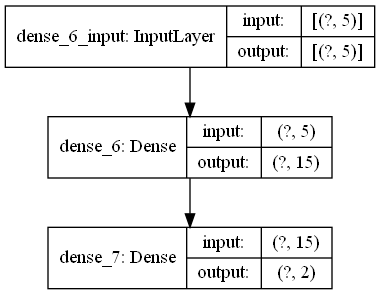

In [8]:
# The goal is to train a generator model,not a discriminator model, 
# and that is where the complexity of GANs truly lies.

#Inputs: Point in latent space, e.g. a five-element vector of Gaussian random numbers.
#Outputs: Two-element vector representing a generated sample for our function (x and x2).


# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model

# define the discriminator model
model = define_generator(5)

# summarize the model
model.summary()

# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

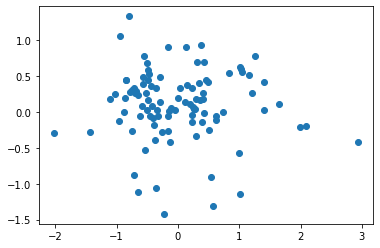

In [12]:
# A linear activation function is used because we know we want the generator to output a vector of real values 
# and the scale will be [-0.5, 0.5] for the first element and about [0.0, 0.25] for the second element.
# A latent variable is a hidden or unobserved variable, and a latent space is a multi-dimensional vector space of these variables.


# define and use the generator model
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model


# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    # generate points in the latent space
    x_input = randn(latent_dim * n)
    
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    return x_input


# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    
    # predict outputs
    X = generator.predict(x_input)
    
    # plot the results
    pyplot.scatter(X[:, 0], X[:, 1])
    pyplot.show()
    
    
# size of the latent space
latent_dim = 5

# define the discriminator model
model = define_generator(latent_dim)

# generate and plot generated samples
generate_fake_samples(model, latent_dim, 100)


# the generator generates 100 fake samples from our one-dimensional function domain. As
# the generator has not been trained, the generated points are complete rubbish, as we expect,
# but we can imagine that as the model is trained, these points will slowly begin to resemble the
# target function and its u-shape.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 2)                 122       
_________________________________________________________________
sequential_6 (Sequential)    (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


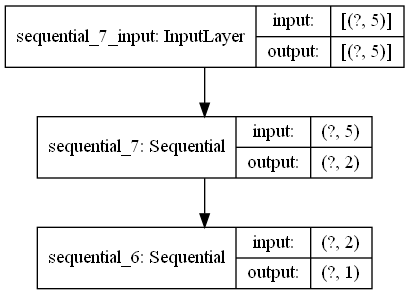

In [13]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    
    # connect them
    model = Sequential()
    
    # add generator
    model.add(generator)
    
    # add the discriminator
    model.add(discriminator)
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    return model


# size of the latent space
latent_dim = 5

# create the discriminator
discriminator = define_discriminator()

# create the generator
generator = define_generator(latent_dim)

# create the gan
gan_model = define_gan(generator, discriminator)

# summarize gan model
gan_model.summary()

# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

# Complete Example of Training the GAN


In [32]:
# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [33]:
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform',input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [34]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model

In [35]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    
    # connect them
    model = Sequential()
    
    # add generator
    model.add(generator)
    
    # add the discriminator
    model.add(discriminator)
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [36]:
# generate n real samples with class labels
def generate_real_samples(n):
    
    # generate inputs in [-0.5, 0.5]
    X1 = rand(n) - 0.5
    
    # generate outputs X^2
    X2 = X1 * X1
    
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X = hstack((X1, X2))
    
    # generate class labels
    y = ones((n, 1))
    
    return X, y

In [37]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    # generate points in the latent space
    x_input = randn(latent_dim * n)
    
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    
    return x_input

In [38]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    
    # predict outputs
    X = generator.predict(x_input)
    
    # create class labels
    y = zeros((n, 1))  # create zeros of shape (n,1)
    
    return X, y

In [47]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    # prepare real samples
    x_real, y_real = generate_real_samples(n)
    
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
    pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
    
    # save plot to file
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    pyplot.savefig(filename)
    pyplot.close()

In [50]:
# train the generator and discriminator

def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128,n_eval=2000):
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real, y_real = generate_real_samples(half_batch)
        
        # prepare fake examples
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        
        # update discriminator
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        
        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch)
        
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))
        
        # update the generator via the discriminator✬s error
        gan_model.train_on_batch(x_gan, y_gan)
        
        # evaluate the model every n_eval epochs
        if (i+1) % n_eval == 0:
            summarize_performance(i, g_model, d_model, latent_dim)

In [51]:
# size of the latent space
latent_dim = 5

# create the discriminator
discriminator = define_discriminator()

# create the generator
generator = define_generator(latent_dim)

# create the gan
gan_model = define_gan(generator, discriminator)

# train model
train(generator, discriminator, gan_model, latent_dim)

1999 0.5400000214576721 0.5099999904632568
3999 0.4399999976158142 0.44999998807907104
5999 0.14000000059604645 0.7900000214576721
7999 0.6100000143051147 0.6000000238418579
9999 0.6000000238418579 0.41999998688697815
